Exercise 2.3: The Gray-Scott model - A reaction-diffusion system

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [137]:
#Define some of the parameters:
D_u = 0.16
D_v = 0.08
#f = 0.025
f = 0.035
k = 0.060
delta_x = 1
delta_t = 1

N = 100 #size of the grid

In [138]:
#Define D_u^* and D_v^* the same way as in the slides (this is for clarity)

def D_u_star(i,j,uu):
    D_u_starr = D_u*(uu[i,(j+1)%(N+1)] + uu[i,(j-1)%(N+1)] + uu[(i+1)%(N+1),j] + uu[(i-1)%(N+1),j] - 4*uu[i,j])/(delta_x**2)
    return(D_u_starr)

def D_v_star(i,j,vv):
    D_v_starr = D_v*(vv[i,(j+1)%(N+1)] + vv[i,(j-1)%(N+1)] + vv[(i+1)%(N+1),j] + vv[(i-1)%(N+1),j] - 4*vv[i,j])/(delta_x**2)
    return(D_v_starr)

In [139]:
def system_at_time(t):
    u_old = np.zeros((N+1,N+1))
    u_old[:,:] = 0.5
    v_old = np.zeros((N+1,N+1))
    v_old[46:54,46:54] = 0.25

    u_new = u_old.copy()
    v_new = v_old.copy()

    theta = 0

    while theta<t:
        for i in range(N+1):
            for j in range(N+1):
                u_new[i,j] = u_old[i,j] + delta_t*(D_u_star(i,j,u_old) - u_old[i,j]*v_old[i,j]*v_old[i,j] + f*(1-u_old[i,j]))
                v_new[i,j] = v_old[i,j] + delta_t*(D_v_star(i,j,v_old) + u_old[i,j]*v_old[i,j]*v_old[i,j] - (f+k)*v_old[i,j])
        theta += delta_t
        u_old = u_new.copy()
        v_old = v_new.copy()
    
    return u_new,v_new

In [142]:
system_250 = system_at_time(250)

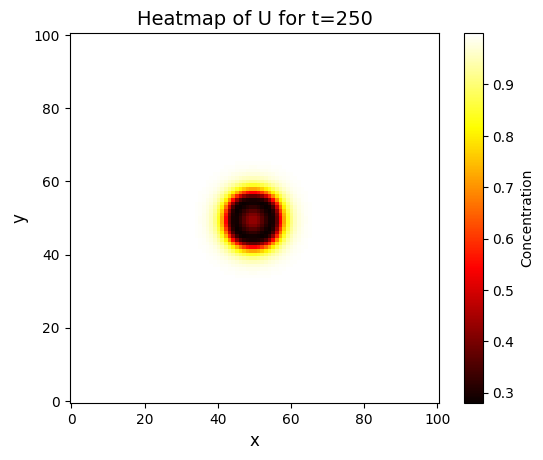

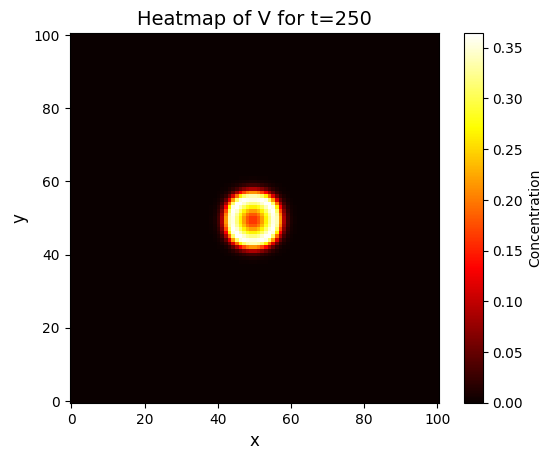

In [143]:
plt.imshow(system_250[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of U for t=250',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(system_250[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of V for t=250',size=14)
plt.colorbar(label='Concentration')
plt.show()

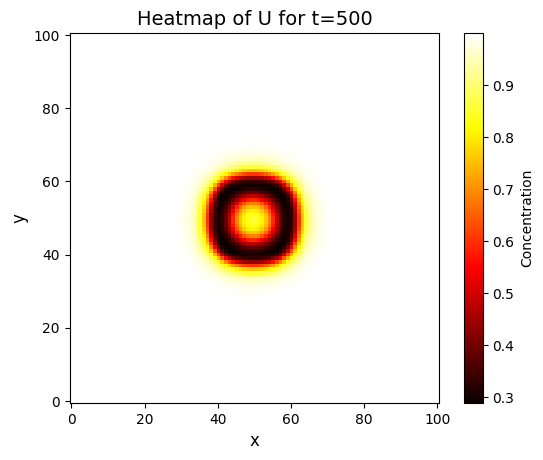

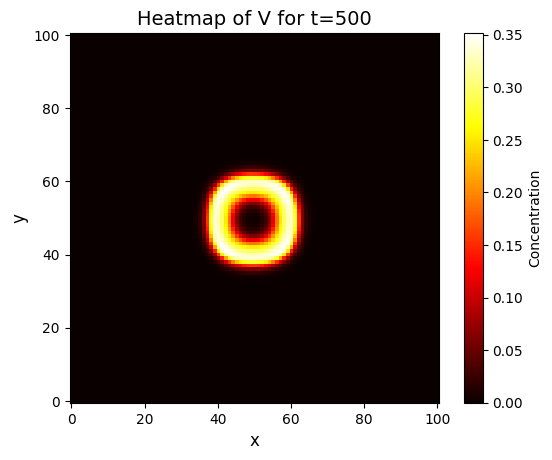

In [144]:
system_500 = system_at_time(500)

plt.imshow(system_500[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of U for t=500',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(system_500[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of V for t=500',size=14)
plt.colorbar(label='Concentration')
plt.show()

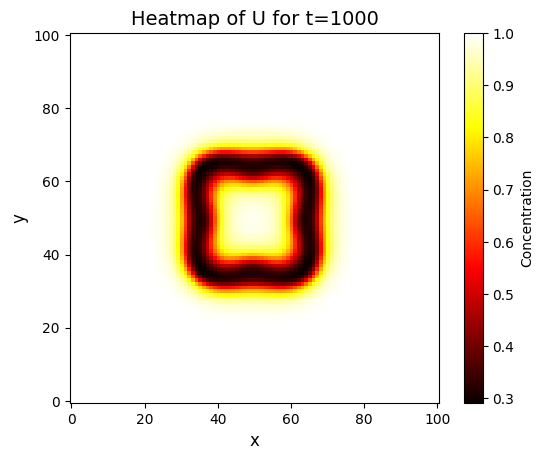

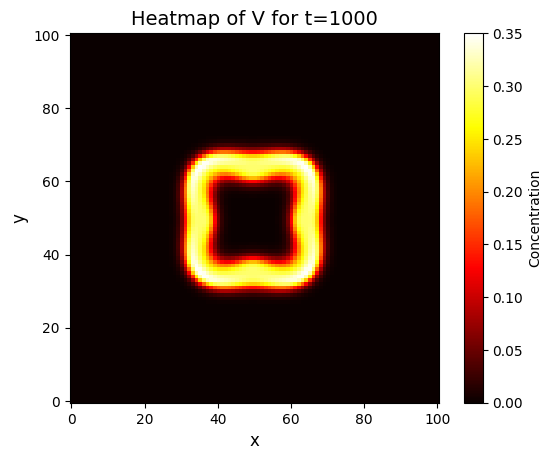

In [145]:
system_1000 = system_at_time(1000)

plt.imshow(system_1000[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of U for t=1000',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(system_1000[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of V for t=1000',size=14)
plt.colorbar(label='Concentration')
plt.show()


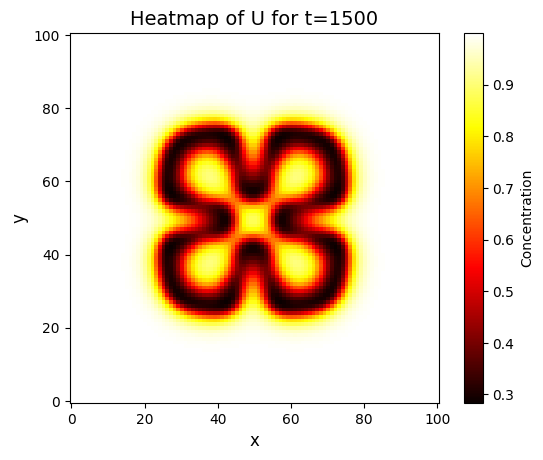

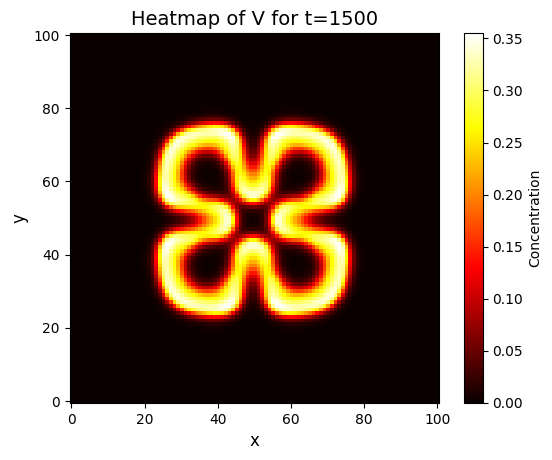

In [146]:
system_1500 = system_at_time(1500)

plt.imshow(system_1500[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of U for t=1500',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(system_1500[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of V for t=1500',size=14)
plt.colorbar(label='Concentration')
plt.show()

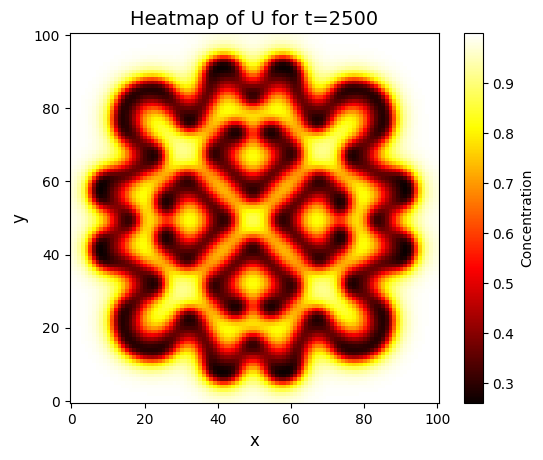

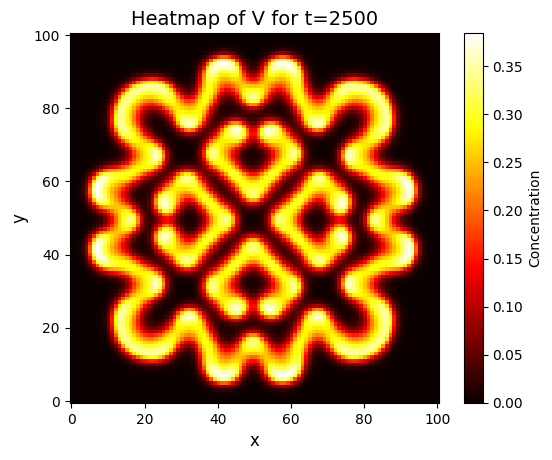

In [147]:
system_2500 = system_at_time(2500)

plt.imshow(system_2500[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of U for t=2500',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(system_2500[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of V for t=2500',size=14)
plt.colorbar(label='Concentration')
plt.show()

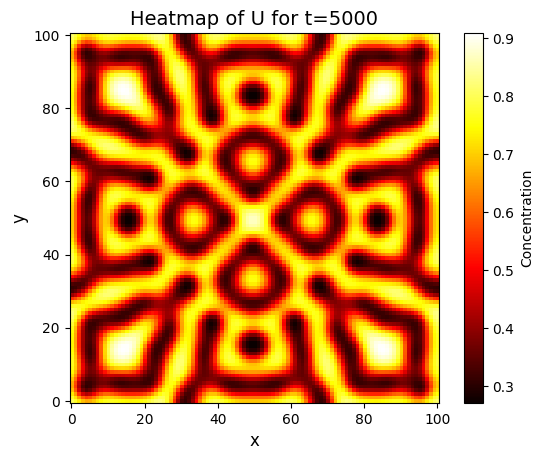

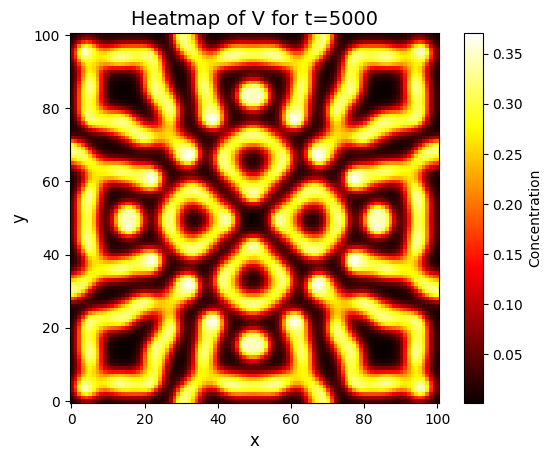

In [148]:
system_5000 = system_at_time(5000)

plt.imshow(system_5000[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of U for t=5000',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(system_5000[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of V for t=5000',size=14)
plt.colorbar(label='Concentration')
plt.show()

=====================================================================================================================================

Here, we add noise to both the concentration of U as well as V is the starting conditions. We only add noise in case the initial value for V is not zero.

In [132]:
noise_u = np.random.normal(0,0.5,size=((N+1),(N+1)))
noise_v = np.random.normal(0,0.25,size=(8,8))

In [133]:
def noisy_vu_start_system_at_time(t):
    u_old = np.zeros((N+1,N+1))
    u_old[:,:] = 0.5
    u_old = abs(u_old + noise_u)
    v_old = np.zeros((N+1,N+1))
    v_old[46:54,46:54] = abs(0.25 + noise_v)

    u_new = u_old.copy()
    v_new = v_old.copy()

    theta = 0

    while theta<t:
        for i in range(N+1):
            for j in range(N+1):
                u_new[i,j] = u_old[i,j] + delta_t*(D_u_star(i,j,u_old) - u_old[i,j]*v_old[i,j]*v_old[i,j] + f*(1-u_old[i,j]))
                v_new[i,j] = v_old[i,j] + delta_t*(D_v_star(i,j,v_old) + u_old[i,j]*v_old[i,j]*v_old[i,j] - (f+k)*v_old[i,j])
        theta += delta_t
        u_old = u_new.copy()
        v_old = v_new.copy()
    
    return u_new,v_new

In [134]:
noisy_vu_start_system_250 = noisy_vu_start_system_at_time(250)
noisy_vu_start_system_500 = noisy_vu_start_system_at_time(500)
noisy_vu_start_system_1000 = noisy_vu_start_system_at_time(1000)
noisy_vu_start_system_1500 = noisy_vu_start_system_at_time(1500)
noisy_vu_start_system_2500 = noisy_vu_start_system_at_time(2500)

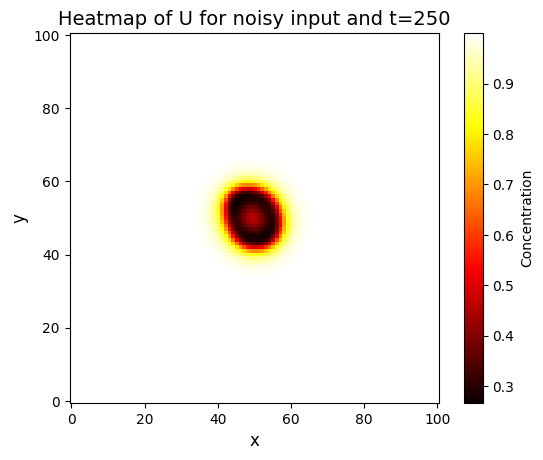

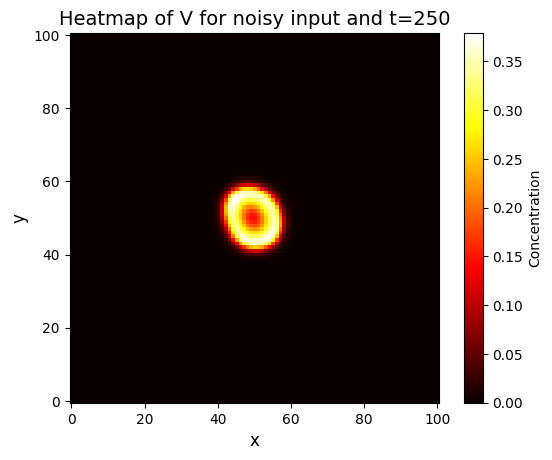

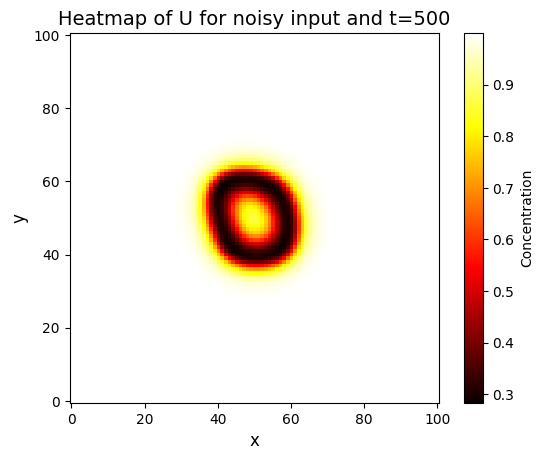

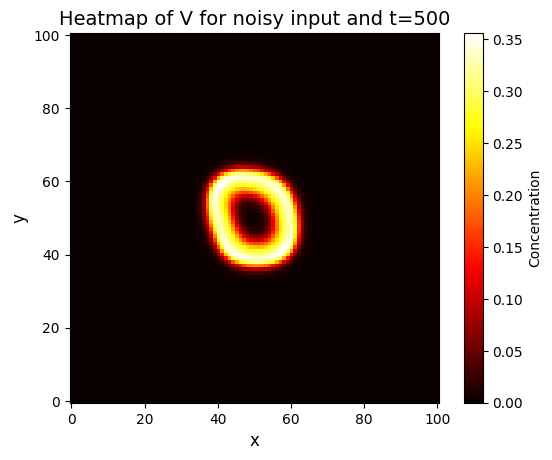

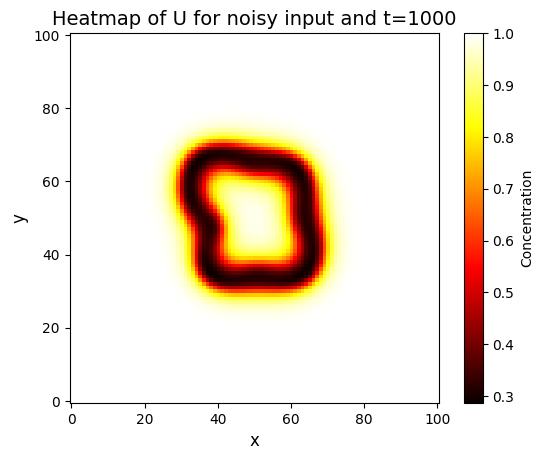

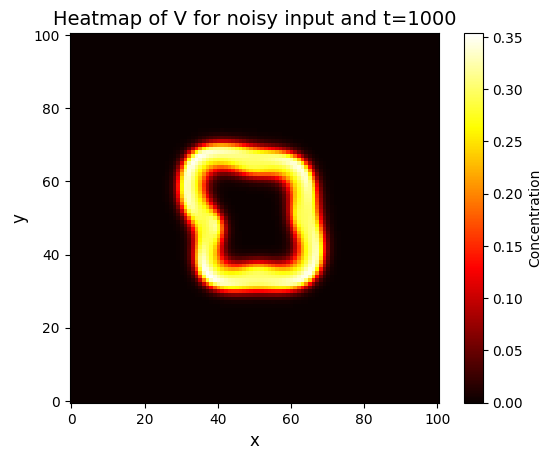

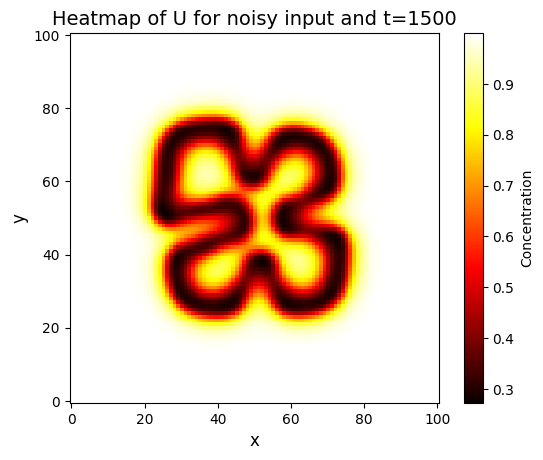

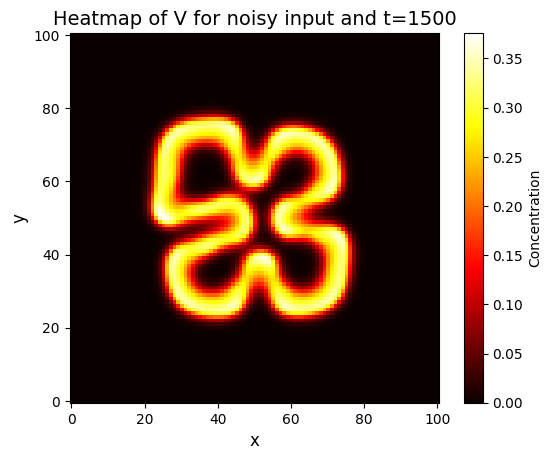

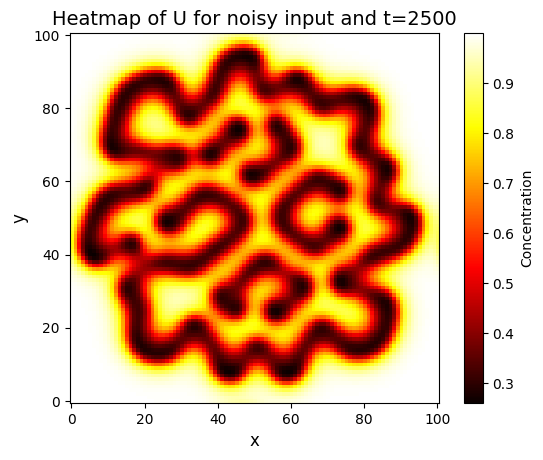

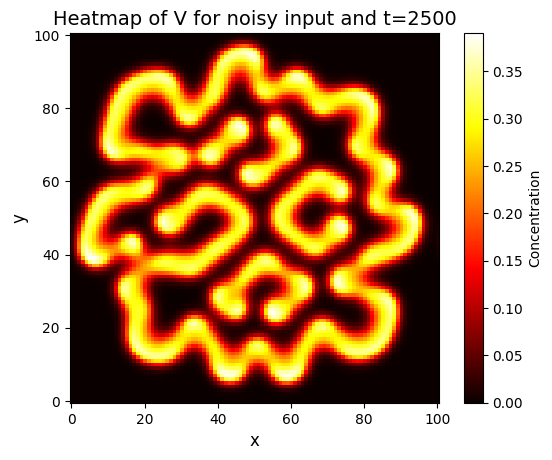

In [135]:
plt.imshow(noisy_vu_start_system_250[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of U for noisy input and t=250',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(noisy_vu_start_system_250[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of V for noisy input and t=250',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(noisy_vu_start_system_500[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of U for noisy input and t=500',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(noisy_vu_start_system_500[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of V for noisy input and t=500',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(noisy_vu_start_system_1000[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of U for noisy input and t=1000',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(noisy_vu_start_system_1000[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of V for noisy input and t=1000',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(noisy_vu_start_system_1500[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of U for noisy input and t=1500',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(noisy_vu_start_system_1500[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of V for noisy input and t=1500',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(noisy_vu_start_system_2500[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of U for noisy input and t=2500',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(noisy_vu_start_system_2500[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap of V for noisy input and t=2500',size=14)
plt.colorbar(label='Concentration')
plt.show()


====================================================================================================================================================================================================

The remaining adds individual noise, which is only a simplification of what happens above.

Add noise to the initial conditions of U:

In [98]:
#Add noise to initial conditions of u:

noise = np.random.normal(0,0.5,size=((N+1),(N+1)))

In [ ]:
#Add noise to initial conditions of u:

def noisy_start_system_at_time(t):
    u_old = np.zeros((N+1,N+1))
    u_old[:,:] = 0.5
    u_old = abs(u_old + noise)
    v_old = np.zeros((N+1,N+1))
    v_old[46:54,46:54] = 0.25

    u_new = u_old.copy()
    v_new = v_old.copy()

    theta = 0

    while theta<t:
        for i in range(N+1):
            for j in range(N+1):
                u_new[i,j] = u_old[i,j] + delta_t*(D_u_star(i,j,u_old) - u_old[i,j]*v_old[i,j]*v_old[i,j] + f*(1-u_old[i,j]))
                v_new[i,j] = v_old[i,j] + delta_t*(D_v_star(i,j,v_old) + u_old[i,j]*v_old[i,j]*v_old[i,j] - (f+k)*v_old[i,j])
        theta += delta_t
        u_old = u_new.copy()
        v_old = v_new.copy()
    
    return u_new,v_new

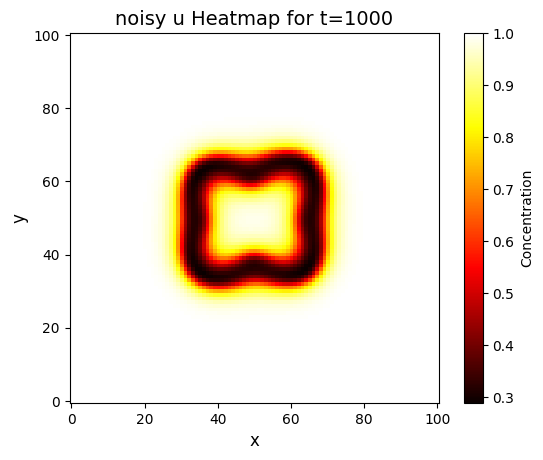

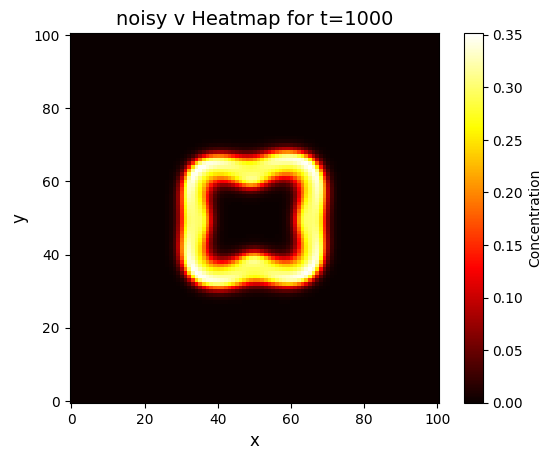

In [100]:
noisy_start_system_1000 = noisy_start_system_at_time(1000)

plt.imshow(noisy_start_system_1000[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('noisy u Heatmap for t=1000',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(noisy_start_system_1000[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('noisy v Heatmap for t=1000',size=14)
plt.colorbar(label='Concentration')
plt.show()

Add noise to the initial conditions of V:

In [104]:
noise_v = np.random.normal(0,0.2,size=(8,8))

In [111]:
def noisy_v_start_system_at_time(t):
    u_old = np.zeros((N+1,N+1))
    u_old[:,:] = 0.5
    v_old = np.zeros((N+1,N+1))
    v_old[46:54,46:54] = abs(0.25 + noise_v)


    u_new = u_old.copy()
    v_new = v_old.copy()

    theta = 0

    while theta<t:
        for i in range(N+1):
            for j in range(N+1):
                u_new[i,j] = u_old[i,j] + delta_t*(D_u_star(i,j,u_old) - u_old[i,j]*v_old[i,j]*v_old[i,j] + f*(1-u_old[i,j]))
                v_new[i,j] = v_old[i,j] + delta_t*(D_v_star(i,j,v_old) + u_old[i,j]*v_old[i,j]*v_old[i,j] - (f+k)*v_old[i,j])
        theta += delta_t
        u_old = u_new.copy()
        v_old = v_new.copy()
    
    return u_new,v_new

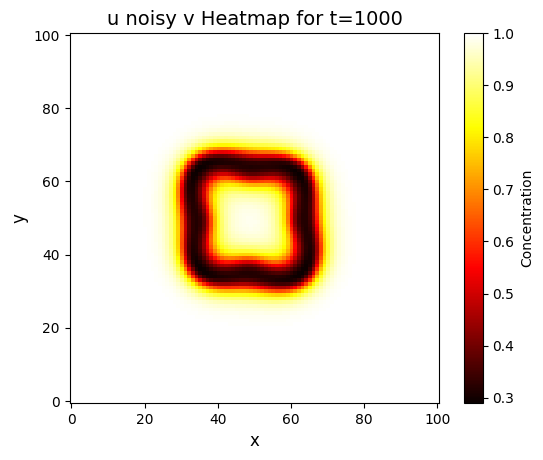

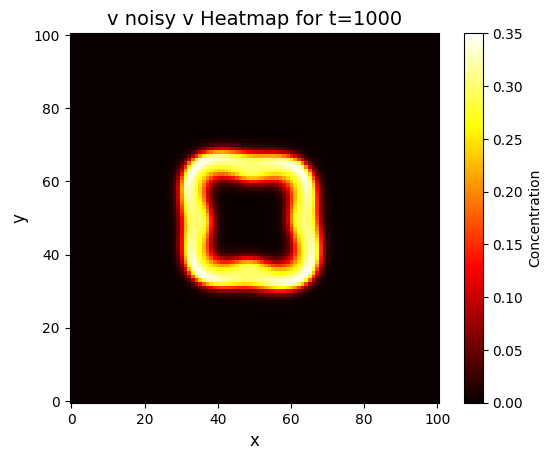

In [112]:
noisy_v_start_system_1000 = noisy_v_start_system_at_time(1000)

plt.imshow(noisy_v_start_system_1000[0],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('u noisy v Heatmap for t=1000',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(noisy_v_start_system_1000[1],cmap='hot', origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('v noisy v Heatmap for t=1000',size=14)
plt.colorbar(label='Concentration')
plt.show()